In [2]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

In [3]:
x1 = np.loadtxt("C:/Users/Asus/Desktop/cmpe 547/hw2/x1.csv")
x2 = np.loadtxt("C:/Users/Asus/Desktop/cmpe 547/hw2/x2.csv")


# Q1

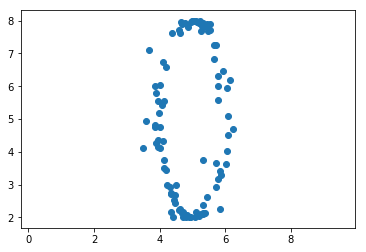

In [4]:
plt.scatter(x1, x2)
plt.axis('equal')
plt.show()

# Q2 , Q3 and Q4

 It resembles an ellipse centered at (5,5) with equation x1^2 + (x2/3)^2 = 1. It seems x-values of the points mostly concentrated around x=5. It also seems that errors are much smaller around x =5. In addition, errors seem to be mostly horizontal and this means errors of x1 dominates errors of x2. Hence, I can suggest a generative model as follows:
 

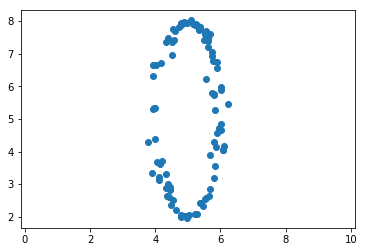

In [6]:
N = 100
sigma1 = 0.15  
sigma2 = 0.05
a=np.sin(2*np.pi*np.random.rand(N))
b= np.sqrt(9-9*a**2)
a_error=np.random.randn(N)*sigma1*a
b_error=np.random.randn(N)*sigma2
a=a+a_error+5

elements = [1,-1]
prob = [0.5, 0.5]
b= b*np.random.choice(elements, N,prob)
b=b+b_error+5

plt.axis('equal')
plt.scatter(a,b)
plt.show()

# Q5

For similarity, I can compare the mean and variance of the datasets. I can also look at their histograms to see if they show a similar behaviour.  